<a href="https://colab.research.google.com/github/Antony-gitau/machine_learning_playground/blob/main/understanding_gridsearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this notebook contains some practise work with creating a model and then conducting a grid search on it following some blos -> https://towardsdatascience.com/grid-search-for-model-tuning-3319b259367e

Fetched the data!

In [1]:
!pip install ucimlrepo

In [126]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X2 = breast_cancer_wisconsin_original.data.features
y2 = breast_cancer_wisconsin_original.data.targets

# metadata
print(breast_cancer_wisconsin_original.metadata)

# variable information
print(breast_cancer_wisconsin_original.variables)


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [59]:
y2.value_counts()
y2.head()

y2['Class'] = np.where(y2['Class'] == 2, 0, 1)

<ipython-input-59-1a5ff738a0d5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y2['Class'] = np.where(y2['Class'] == 2, 0, 1)


In [61]:
y = y2

In [62]:
X.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [63]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [64]:
y.value_counts()

Class
0        458
1        241
dtype: int64

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X2, y, random_state=42)


In [66]:
print(len(X))
print(len(X_train))
print(len(X_test))
print("y")
print(len(y))
print(len(y_train))
print(len(y_test))

699
524
175
y
699
524
175


In [67]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [68]:
import pandas as pd


In [69]:
pd.Series(y_pred).value_counts()

0    175
dtype: int64

In [70]:
y_test.value_counts()

Class
0        118
1         57
dtype: int64

In [ ]:
#from the above, we can see that the dummy model has predicted all instances as 2 while the test shows that
# we have some class 4 as well. the dummy classifier predicted all the majority as class 2 because they
#are the majority

In [73]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.6742857142857143
0.0
0.0
0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


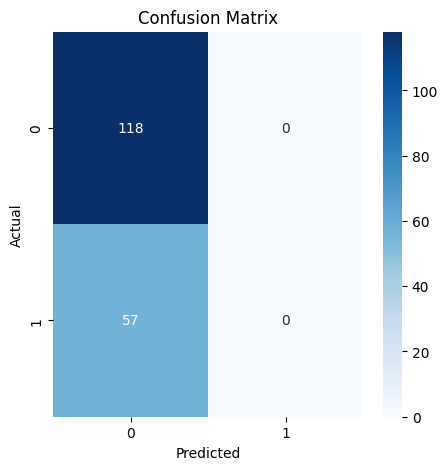

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize =(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [77]:
#now we use logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier

clf2 = HistGradientBoostingClassifier().fit(X_train,y_train)

y_pred2 = clf2.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
print(accuracy_score(y_test, y_pred2))
print(f1_score(y_test, y_pred2))
print(recall_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.96
0.9380530973451328
0.9298245614035088
0.9464285714285714


[[115   3]
 [  4  53]]


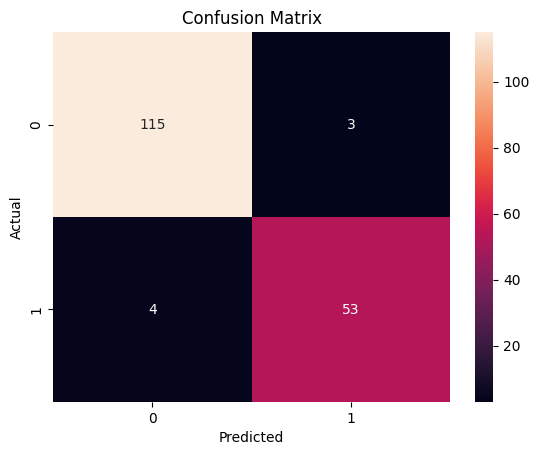

In [109]:
print(confusion_matrix(y_test, y_pred2))
cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm2, annot=True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [140]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train,y_train)
y_pred = clf.predict(X_test)

# Model Evaluation metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#Logistic Regression Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Grid search!

In [134]:
X2_copy = X2.copy()

In [137]:
X2_copy.shape

(699, 9)

In [139]:
from sklearn.model_selection import GridSearchCV
clf3 = LogisticRegression()
grid_values = {'penalty': ['l1','l2'], 'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf3, param_grid = grid_values, scoring = 'recall')
grid_clf_acc.fit(X_train, y_train)

y_pred_acc = grid_clf_acc.predict(X_test)

accuracy_score(y_test, y_pred_acc)
precision_score(y_test, y_pred_acc)
recall_score(y_test, y_pred_acc)
f1_score(y_test, y_pred_acc)

ValueError: 
All the 80 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1196, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 921, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 161, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [130]:
X_train.shape

(524, 9)

In [131]:
y_train.shape

(524, 1)

In [115]:
X = X[X['Bare_nuclei'] != '?']

In [83]:
X_train.isna().any()

Clump_thickness                False
Uniformity_of_cell_size        False
Uniformity_of_cell_shape       False
Marginal_adhesion              False
Single_epithelial_cell_size    False
Bare_nuclei                     True
Bland_chromatin                False
Normal_nucleoli                False
Mitoses                        False
dtype: bool

In [84]:
X.isnull().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
dtype: int64

In [89]:
X_train['Bare_nuclei']

163     3.0
286    10.0
612    10.0
517     1.0
464     1.0
       ... 
71      2.0
106    10.0
270    10.0
435    10.0
102     1.0
Name: Bare_nuclei, Length: 524, dtype: float64

In [95]:
null_columns = X_train.columns[X_train.isna().any()]

# Printing the columns with null values
print("Columns with NaN values:",len(null_columns))

Columns with NaN values: 1


In [41]:
pd.Series(y_pred2).value_counts()

2    119
4     56
dtype: int64

In [91]:
clf3 = LogisticRegression().fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values